# Radweganalyse

_Nach einer Idee der Fahrrad Zukunft: https://fahrradzukunft.de/35/radweganalyse-per-smartphone_

__Quickstart:__ im Notebook-Interface unter "Cell" die Funktion "Run all" auswählen.

__Details:__ Das Notebook lädt den meisten Code aus dem Modul "SensorCode" nach so dass hier im Notebook nur noch die wichtigsten Funktionsaufrufe erscheinen. Als Input wird eine Zip-Datei mit Sensor-Daten der PyBox erwartet (Variable "archiveFile"). Details siehe den oben verlinkten Artikel. Als Beispiel beinhaltet das Notebook bereits die Datei "whg-Forschungszentrum.zip", es können aber über das Notebook-Interface auch eigene Dateien hochgeladen werden.

Aus der angegebenen Zip-Datei werden aus den Dateien "Location.csv" bzw. "Accelerometer.csv" die Daten des GPS- bzw. Bewegungs-Sensors ausgelesen und in den Listen "geoPoints" bzw. "accPoints" abgelegt.






In [1]:
import SensorCode

archiveFile = "whg-forschungszentrum.zip"

geoPoints = SensorCode.readGeo(archiveFile, "Location.csv")
accPoints = SensorCode.readAcc(archiveFile, "Accelerometer.csv")

print("Anzahl GPS Points: ", len(geoPoints))
print("Anzahl Bewegungs Points: ", len(accPoints))

Anzahl GPS Points:  724
Anzahl Bewegungs Points:  294886


Histogram der Daten auf der Z-Achse: Die X-Achse entsrpicht der Zeit, die Y-Achse dem Ausschlag des Sensor auf der Z-Achse: 

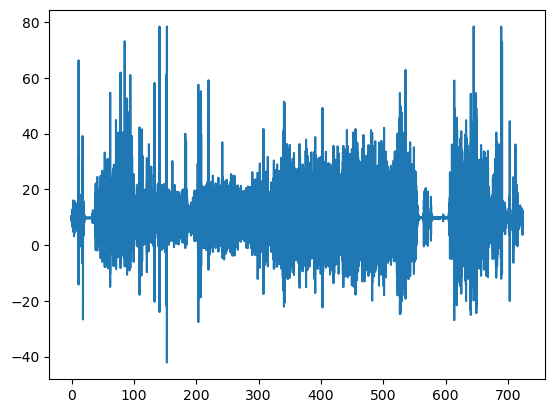

In [2]:
histogram = SensorCode.drawHistogram(accPoints)

## Berechnung: Maximalwerte

Die aufgezeichneten Daten beinhalten wesentlich weniger GPS-Points als Bewegungs-Punkte. Deswegen wird über die Bewegungs-Punkte ein _wanderndes Fenster_ von der Größe __Anzahl Bewegungs-Punkte / Anzahl Geo-Punkte__ gelegt. Innerhalb dieses Fensters wird der _absolute_ Maximalwert der Z-Koordinate der enthaltenen Bewegungs-Punkte berechnet und dieser Wert dem entsprechenden Geo-Punkt zugewiesen.

In [3]:
geoPoints = SensorCode.calculateAccValues(geoPoints, accPoints, "max")
SensorCode.saveGeoPoints(geoPoints, "geoPoints_max.csv")

Window size:  407
Minimum der Z-Daten:  -42.11577225
Maximum der Z-Daten:  78.42715454
Minimum der interpolierten Z-Daten:  0
Maximum der interpolierten Z-Daten:  0


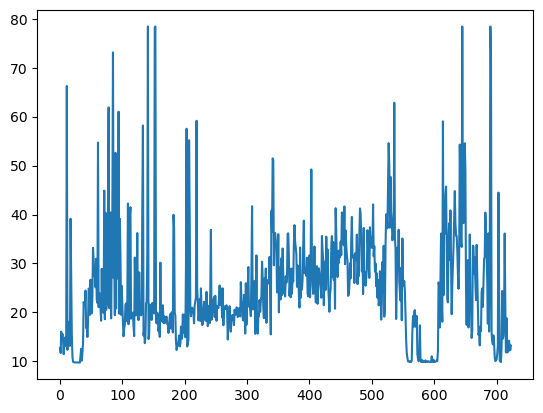

In [4]:
histogram = SensorCode.drawHistogram(geoPoints)

Zusätzlich wird der _Durchschnitt_ der Punkte im Fenster berechnet:

In [5]:
geoPointsAvg = SensorCode.calculateAccValues(geoPoints, accPoints, "average")
SensorCode.saveGeoPoints(geoPointsAvg, "geoPoints_avg.csv")

Window size:  407
Minimum der Z-Daten:  -42.11577225
Maximum der Z-Daten:  78.42715454
Minimum der interpolierten Z-Daten:  0
Maximum der interpolierten Z-Daten:  13.641986764960803


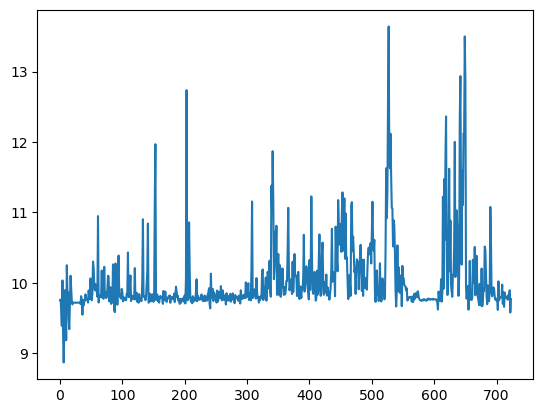

In [6]:
histogram = SensorCode.drawHistogram(geoPointsAvg)

Darstellung der interpolierten Z-Werte der GPS-Punkte auf einer Karte (macimla Werte im Fenster, nicht die Durchschnittswerte). Der Mittelpunkt der Karte wird berehcnet (calcGeoMiddle). Anschließend werden alle GPS-Points auf die Karte gezeichnet (drawMap). Der letzte Parameter der drawMap-Funktion stellt den Grenzwert dar, ab dem der Punkt rot gezeichnet wird: Punkte unterhalb dieses Wertes werden grau dargestellt.

In [17]:
lat, lon = SensorCode.calcGeoMiddle(geoPoints)

m = SensorCode.drawMap(geoPoints, lat, lon, 11)
m